In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
from tqdm.notebook import tqdm
import pickle
import glob

from modules_lib.data import KEYS as keys
from modules_lib.data import get_data_from_data_frame
from modules_lib.data import read_data
from modules_lib.data import get_data_from_old_data_frame
from modules_lib.data import read_old_dataset

path_dataset = '/media/irfan-flw/DATA/Arbeit/6GEM/Program_Development/6GEM_Dataset/Dataset_Sensor_Floor_Final/24102022/train/'
os.chdir(path_dataset)
#data_dir = '../../Sensorfloors/summerschool2020/Robot_Data/train/*'
data_dir = 'run4_random.csv'

file_list = sorted(glob.glob(data_dir))

# dfs = []
# for input_file in file_list:
#     print('Loading:', input_file)
#     dfs.append(pd.read_csv(input_file).drop(['data'], axis=1))

In [2]:
#train = []
n_files = len(file_list)
y_list = []
t_list = []
X_list = []
offset = 2459877.0729167
for file_index, file in enumerate(file_list):
    print('Loading:', file)
        
    #frames, y, t, X = read_old_dataset(file)
    frames, y, t, X = read_data(file, offset)
            
    X_list.append(X)
    y_list.append(y)
    t_list.append(t)
    

Loading: run4_random.csv


  0%|          | 0/2010 [00:00<?, ?it/s]

ValueError: Expected object or value

In [3]:
# # X_np = np.array(X_list)
# y_np = np.array(y_list)
# vicon_data = y_np[index_data]

In [4]:
# rssi_data = X_np[index_data]
# numDataPoints_rssi = len(rssi_data)
# #t_sf = [x += 1 for idx, x in enumerate(rssi_data)]
# t_sf = [idx for idx, x in enumerate(rssi_data)]
# len(t_sf)

In [3]:
t_list

[]

### Check the Heatmap data

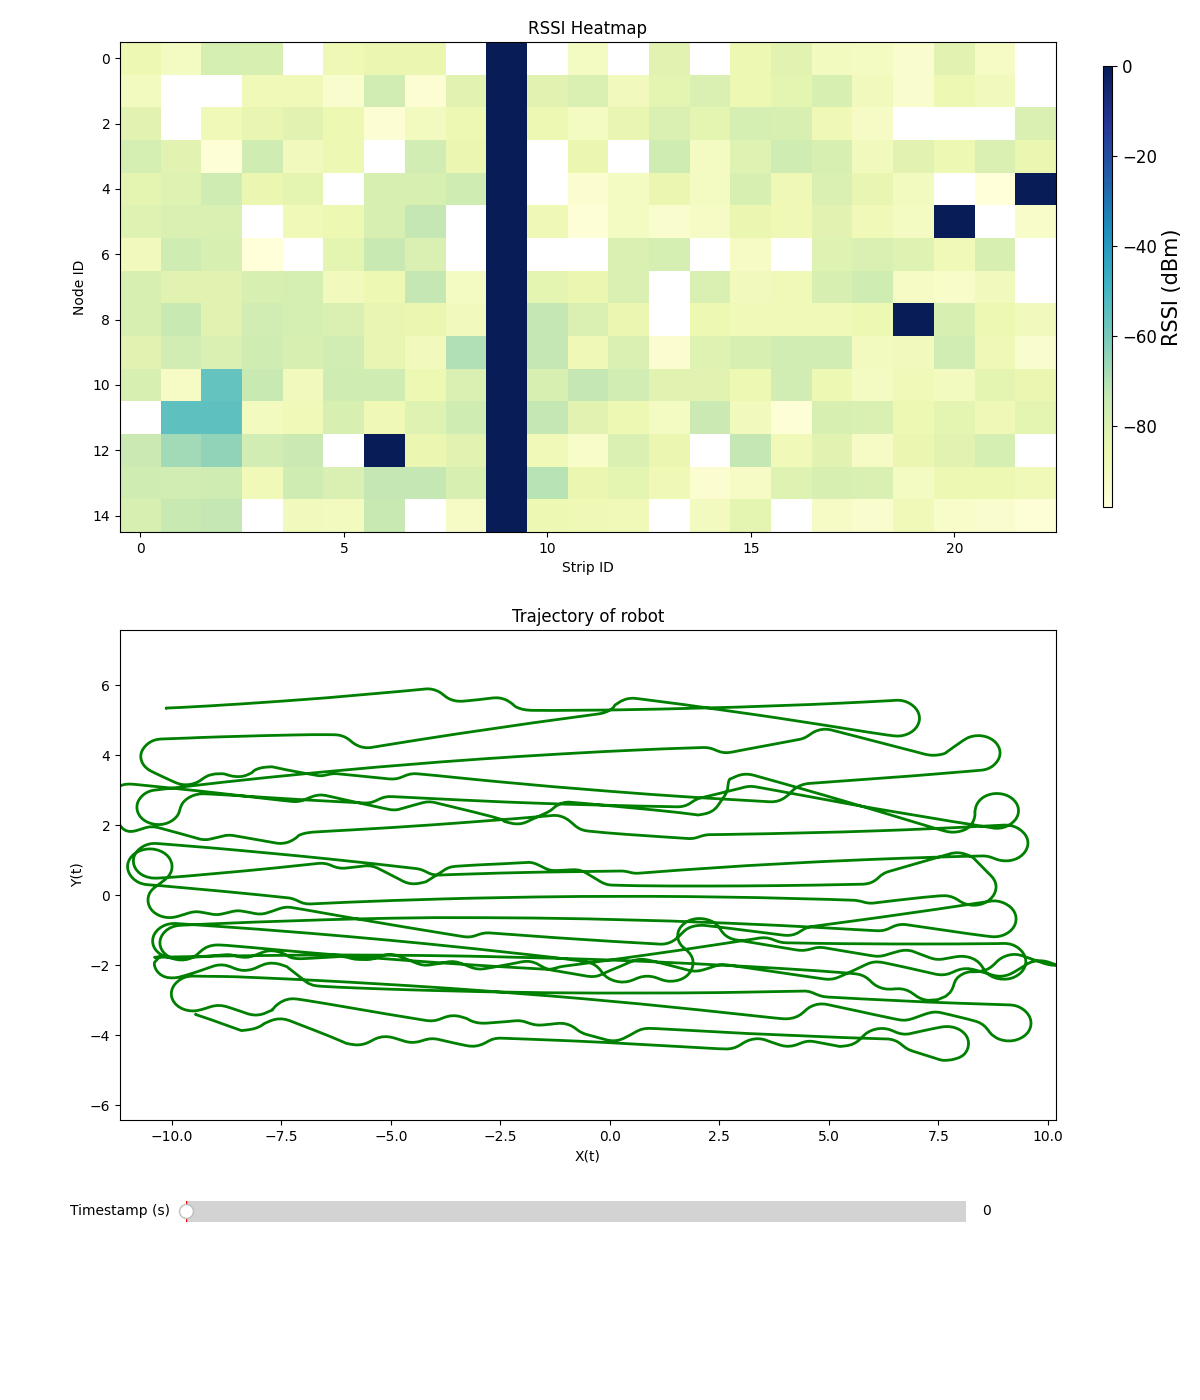

In [6]:
#MERGE RSSI HEATMAP & VICON COORDINATES WITH SLIDER

#Heatmap animation over the time
from turtle import width
import matplotlib.animation as animation
%matplotlib ipympl
from matplotlib.widgets import Slider, Button, RadioButtons
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

index_data = 0

X_np = np.array(X_list) #Sensor floor data
y_np = np.array(y_list) #Vicon Data

#DEFINE DATASET ARRAY
rssi_data = X_np[index_data]
rssi_data_transpose = np.transpose(rssi_data, [0,2,1,3])
#print(rssi_data_transpose.shape)
numDataPoints_rssi = len(rssi_data)
index_list = [idx for idx, x in enumerate(rssi_data)]

#delta_t_sf = round((max(t_sf)-min(t_sf))/numDataPoints_rssi, 6)

#-------------------------------------------------------------------------------------------------------------------#

#CREATE DATASET FOR VICON COORDINATES

vicon_data = y_np[index_data]

# delta_t_vc = round((t_vc.max()-t_vc.min())/numDataPoints_vc, 6)
#-------------------------------------------------------------------------------------------------------------------#

# GET SOME MATPLOTLIB OBJECTS
#fig, (ax1, ax2) = plt.subplots(figsize=(10,12), nrows=2)
fig = plt.figure(figsize=(12,14))
plt.subplots_adjust(bottom=0.25)


# AXES PROPERTIES RSSI HEATMAP
ax1 = fig.add_subplot(211) #(row, column, pos)
#ax1.set_autoscale_on
ax1.set_xlabel('Strip ID')
ax1.set_ylabel('Node ID')
ax1.set_title('RSSI Heatmap')

# # AXES PROPERTIES VICON COORDINATES
ax2 = fig.add_subplot(212)
ax2.set_xlim(-11.185, 10.185)
ax2.set_ylim(-6.425, 7.575)
ax2.set_xlabel('X(t)')
ax2.set_ylabel('Y(t)')
ax2.set_title('Trajectory of robot')


# Defining the Slider button
# xposition, yposition, width and height
# ax_slide_sf = plt.axes([0.155, 0.02, 0.65, 0.03])
# ax_slide_vc = plt.axes([0.155, 0.07, 0.65, 0.03])
ax_slide_merge = plt.axes([0.155, 0.12, 0.65, 0.03])


#DISPLAY INITIAL IMAGE
im_h = ax1.imshow(rssi_data_transpose[numDataPoints_rssi-1,:,:,9], cmap="YlGnBu", aspect='auto')
axins = inset_axes(ax1,
                   width="1%",  # width = 5% of parent_bbox width
                   height="90%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 1.25, 1, 1),
                   bbox_transform=ax2.transAxes,
                   borderpad=0,
                   )
cbar = plt.colorbar(im_h, cax=axins, ax=ax1)
#cbar = plt.colorbar(im_h, ax=ax1)
cbar.set_label(label='RSSI (dBm)', size=15)
cbar.ax.tick_params(labelsize=12)

line = ax2.plot(vicon_data[:,0], vicon_data[:,1], lw=2, c='g')[0] # For line plot


#normal data
#timestamp_rssi = Slider(ax_slide_sf, 'Timestamp SF(s)',
#                  min(t_sf), max(t_sf), valinit=min(t_sf), valstep=1)
# timestamp_vc = Slider(ax_slide_vc, 'Timestamp VC(s)',
#                   t_vc.min(), t_vc.max(), valinit=t_vc.min(), valstep=delta_t_vc)
timestamp_merge = Slider(ax_slide_merge, 'Timestamp (s)',
                  min(index_list), max(index_list), valinit=min(index_list), valstep=1)

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx


# def update_heatmap(val):
#     pos = timestamp_rssi.val
#     index = find_nearest(dataSet_sf[3], pos)
#     im_h.set_data(rssi_data_transpose[pos,:,:,9])

# def update_coord(val):
#     pos = timestamp_vc.val
#     index = find_nearest(dataSet_vc[2], pos)
#     line.set_xdata(dataSet_vc[0, :index])
#     line.set_ydata(dataSet_vc[1, :index])

#     #redrawing the figure
#     fig.canvas.draw()    

def update_all(val):
    pos = timestamp_merge.val
    #print(pos)
    #index = find_nearest(dataSet_vc[2], pos)
    line.set_xdata(vicon_data[:pos, 0])
    line.set_ydata(vicon_data[:pos, 1])

    #index2 = find_nearest(dataSet_sf[3], pos)
    im_h.set_data(rssi_data_transpose[pos,:,:,9])

    #redrawing the figure
    fig.canvas.draw() 

# Calling the function "update" when the value of the slider is changed
#timestamp_rssi.on_changed(update_heatmap)
# timestamp_vc.on_changed(update_coord)
timestamp_merge.on_changed(update_all)

#fig.tight_layout()
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.88, top=0.97, hspace=0.2)
#plt.subplots_adjust(left=0.155, bottom=0.2, right=0.91, top=0.97, hspace=0.2)
#plt.subplot_tool()
plt.show()

In [22]:
#plt.savefig('output/old_dataset/Run3_Vertical.png', dpi=300)

In [ ]:
import seaborn as sns

plt.figure(figsize=(15, 9))
#sns.set(font_scale=1.4)
ax = sns.heatmap(rssi_data_transpose[2500,:,:,9], annot=True, cbar_kws={'label': 'RSSI'}, cmap="YlGnBu")
ax.figure.axes[-1].yaxis.label.set_size(16)
#sns.set(font_scale=1.4)
plt.title("RSSI Heatmap", fontsize = 16)
plt.ylabel("Node ID", fontsize = 16)
plt.xlabel("Strip ID", fontsize = 16)
#plt.figure(figsize=(1.589, 9.88), dpi=100)
plt.tight_layout()
#plt.savefig('0209_RSSI_Static_test2' + str(count_plt) + '.png')
plt.show()